# ***Sistema de Recomendación de películas***
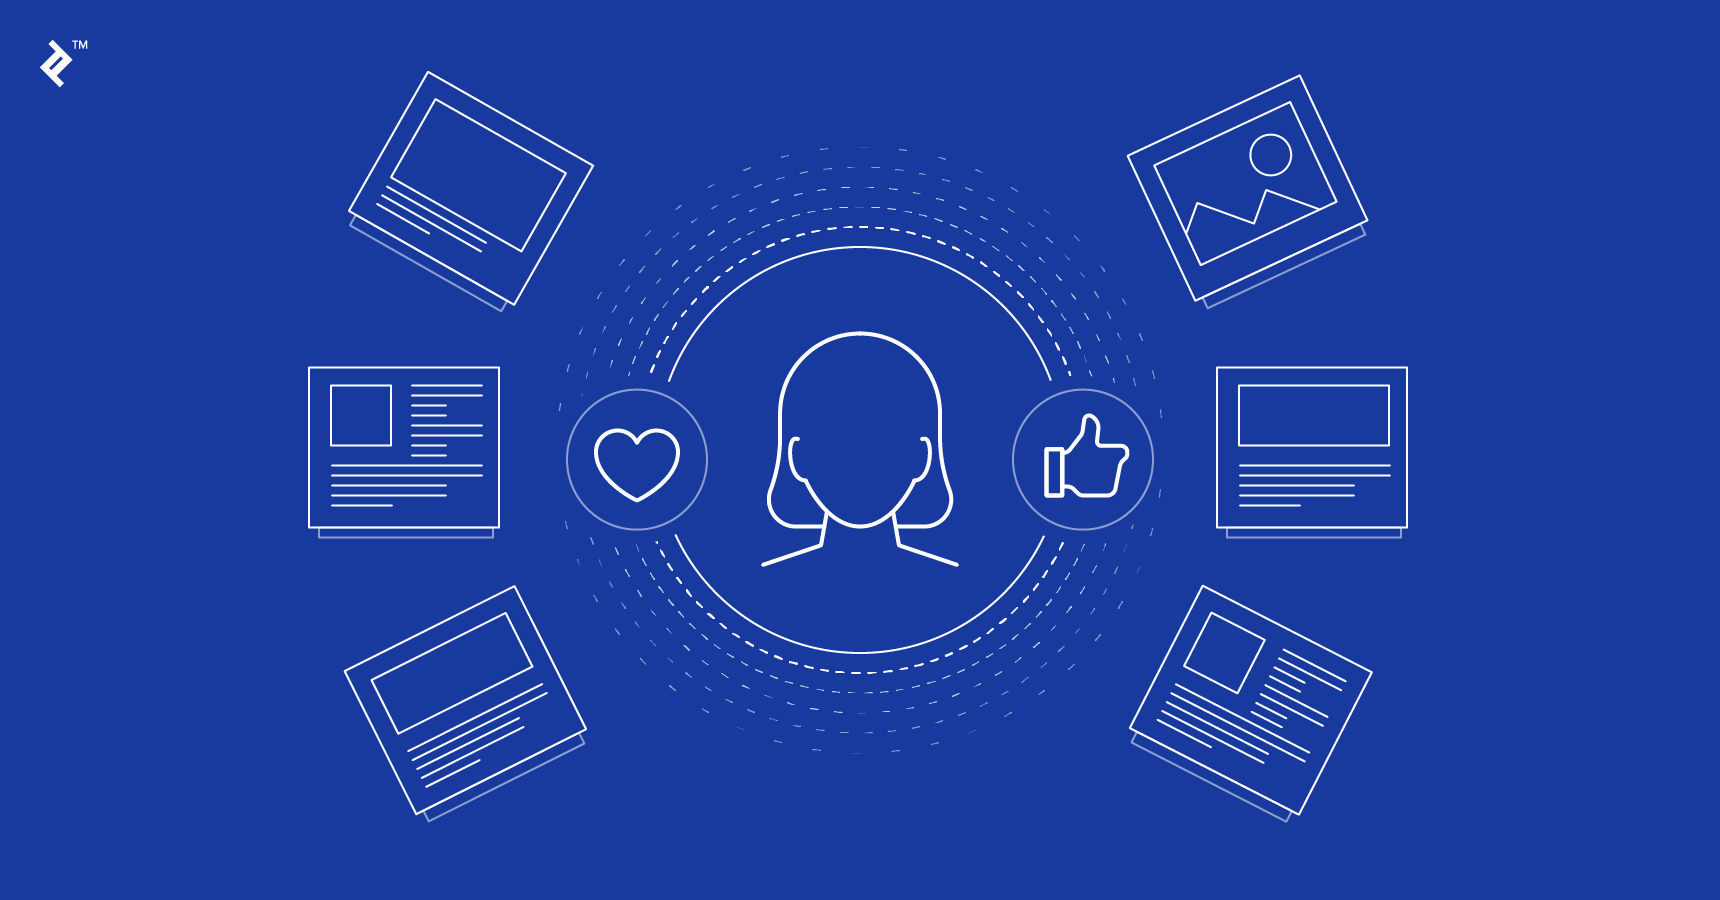

*Fuente de datos*: https://grouplens.org/datasets/movielens/100k/

*Se realiza:*

*   Análisis exploratorio de datos para comprender su estructura y  caracteristicas
*   Limpieza y organización de los datos
*   Se crea sistemas de recomendación por filtrado colaborativo basado en contenido
*   Evaluación del sistema para medir su rendimiento y determinar si cumple con los objetivos establecidos



In [445]:
pip install lightfm

In [446]:
# Montar Google Drive

from google.colab import drive
drive.mount('/content/drive')

#librerias
import pandas as pd
import numpy as np
import re
import numpy as np
from datetime import datetime
from google.colab import data_table
data_table.enable_dataframe_formatter()

#graficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

import configparser
from scipy.sparse import csr_matrix
from tqdm import tqdm


#sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import average_precision_score
from lightfm import LightFM


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [447]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip https://files.grouplens.org/datasets/movielens/ml-100k.zip

--2023-10-17 19:17:31--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip.7’

ml-100k.zip.7       100%[===================>]   4.70M  10.2MB/s    in 0.5s    

2023-10-17 19:17:32 (10.2 MB/s) - ‘ml-100k.zip.7’ saved [4924029/4924029]

unzip:  cannot find or open https://files.grouplens.org/datasets/movielens/ml-100k.zip, https://files.grouplens.org/datasets/movielens/ml-100k.zip.zip or https://files.grouplens.org/datasets/movielens/ml-100k.zip.ZIP.


In [448]:
#italiano


#file_paths = [
    #'/content/drive/MyDrive/Icaro 23/sprint 3 npl/sprint 3/archivos/u.data',
    #'/content/drive/MyDrive/Icaro 23/sprint 3 npl/sprint 3/archivos/u.genre',
    #'/content/drive/MyDrive/Icaro 23/sprint 3 npl/sprint 3/archivos/u.info',
    #'/content/drive/MyDrive/Icaro 23/sprint 3 npl/sprint 3/archivos/u.item',
    #'/content/drive/MyDrive/Icaro 23/sprint 3 npl/sprint 3/archivos/u.occupation',
    #'/content/drive/MyDrive/Icaro 23/sprint 3 npl/sprint 3/archivos/user.txt'

#]

#dataframes = []

#for file_path in file_paths:
    #try:
        #df = pd.read_csv(file_path, sep='\t', header=None, encoding='latin1')
    #except UnicodeDecodeError:
        #df = pd.read_csv(file_path, sep='\t', header=None, encoding='utf-8-sig')
    #dataframes.append(df)

#dataset = pd.concat(dataframes, axis=1)


In [449]:
#italiano
#ruta = '/content/drive/MyDrive/Icaro 23/sprint 3 npl/sprint 3/archivos/user.txt'

#with open(ruta, 'r') as archivo:
    #contenido = archivo.read()

#print(contenido)
#u.user -- Demographic information about the users; this is a tab separated
#list of user id | age | gender | occupation | zip code The user ids are the ones used in the u.data data set.

# **Ruta**

In [450]:

#marina
file_paths = [
    '/content/drive/MyDrive/Data Science  ML/Icaro 23/sprint 3 npl/sprint 3/archivos/u.data',
    '/content/drive/MyDrive/Data Science  ML/Icaro 23/sprint 3 npl/sprint 3/archivos/u.genre',
    '/content/drive/MyDrive/Data Science  ML/Icaro 23/sprint 3 npl/sprint 3/archivos/u.info',
    '/content/drive/MyDrive/Data Science  ML/Icaro 23/sprint 3 npl/sprint 3/archivos/u.item',
    '/content/drive/MyDrive/Data Science  ML/Icaro 23/sprint 3 npl/sprint 3/archivos/u.occupation',
    '/content/drive/MyDrive/Data Science  ML/Icaro 23/sprint 3 npl/sprint 3/archivos/user.txt'

]

dataframes = []

for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, sep='\t', header=None, encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, sep='\t', header=None, encoding='utf-8-sig')
    dataframes.append(df)

dataset = pd.concat(dataframes, axis=1)

#'latin1' (también conocido como ISO-8859-1) es una codificación de un solo byte que puede representar hasta 256 caracteres.
#Esta codificación incluye los caracteres del alfabeto latino, así como algunos caracteres
#especiales utilizados en los idiomas europeos occidentales. Sin embargo, 'latin1' no puede representar todos los caracteres Unicode.
#'utf8' (también conocido como UTF-8) es una codificación de longitud variable que puede representar todos
#los caracteres Unicode. Utiliza de 1 a 4 bytes para representar un carácter, lo que le permite abarcar
#una amplia gama de caracteres de diferentes idiomas y sistemas de escritura. 'utf8' es ampliamente utilizado
# y es compatible con la mayoría de los sistemas y aplicaciones modernas


In [451]:
#marina
ruta = '/content/drive/MyDrive/Data Science  ML/Icaro 23/sprint 3 npl/sprint 3/archivos/user.txt'

with open(ruta, 'r') as archivo:
    contenido = archivo.read()

print(contenido)
#u.user -- Demographic information about the users; this is a tab separated
#list of user id | age | gender | occupation | zip code The user ids are the ones used in the u.data data set.


1|24|M|technician|85711
2|53|F|other|94043
3|23|M|writer|32067
4|24|M|technician|43537
5|33|F|other|15213
6|42|M|executive|98101
7|57|M|administrator|91344
8|36|M|administrator|05201
9|29|M|student|01002
10|53|M|lawyer|90703
11|39|F|other|30329
12|28|F|other|06405
13|47|M|educator|29206
14|45|M|scientist|55106
15|49|F|educator|97301
16|21|M|entertainment|10309
17|30|M|programmer|06355
18|35|F|other|37212
19|40|M|librarian|02138
20|42|F|homemaker|95660
21|26|M|writer|30068
22|25|M|writer|40206
23|30|F|artist|48197
24|21|F|artist|94533
25|39|M|engineer|55107
26|49|M|engineer|21044
27|40|F|librarian|30030
28|32|M|writer|55369
29|41|M|programmer|94043
30|7|M|student|55436
31|24|M|artist|10003
32|28|F|student|78741
33|23|M|student|27510
34|38|F|administrator|42141
35|20|F|homemaker|42459
36|19|F|student|93117
37|23|M|student|55105
38|28|F|other|54467
39|41|M|entertainment|01040
40|38|M|scientist|27514
41|33|M|engineer|80525
42|30|M|administrator|17870
43|29|F|librarian|20854
44|26|M|technic

In [452]:
dataset

,0,1,2,3,0,0,0,0,0
0,196,242,3,881250949,unknown|0,943 users,1|Toy Story (1995)|01-Jan-1995||http://us.imdb...,administrator,1|24|M|technician|85711
1,186,302,3,891717742,Action|1,1682 items,2|GoldenEye (1995)|01-Jan-1995||http://us.imdb...,artist,2|53|F|other|94043
2,22,377,1,878887116,Adventure|2,100000 ratings,3|Four Rooms (1995)|01-Jan-1995||http://us.imd...,doctor,3|23|M|writer|32067
3,244,51,2,880606923,Animation|3,NaN,4|Get Shorty (1995)|01-Jan-1995||http://us.imd...,educator,4|24|M|technician|43537
4,166,346,1,886397596,Children's|4,NaN,5|Copycat (1995)|01-Jan-1995||http://us.imdb.c...,engineer,5|33|F|other|15213
...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,NaN,NaN,NaN,NaN,NaN
99996,716,204,5,879795543,NaN,NaN,NaN,NaN,NaN
99997,276,1090,1,874795795,NaN,NaN,NaN,NaN,NaN
99998,13,225,2,882399156,NaN,NaN,NaN,NaN,NaN


In [453]:
columns_name=['user_id','item_id','rating','timestamp']
#/content/drive/MyDrive/Icaro 23/sprint 3 npl/sprint 3/archivos/u.data
#/content/drive/MyDrive/Data Science  ML/Icaro 23/sprint 3 npl/sprint 3/archivos/u.data
df=pd.read_csv("/content/drive/MyDrive/Data Science  ML/Icaro 23/sprint 3 npl/sprint 3/archivos/u.data",sep="\t",names=columns_name)
#u.data is a tsv file (tab separated values)
print(df.head())
df.shape

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


(100000, 4)

In [454]:
#/content/drive/MyDrive/Data Science  ML/Icaro 23/sprint 3 npl/sprint 3/archivos/u.item
#/content/drive/MyDrive/Icaro 23/sprint 3 npl/sprint 3/archivos/u.item
movies = pd.read_csv("/content/drive/MyDrive/Data Science  ML/Icaro 23/sprint 3 npl/sprint 3/archivos/u.item", sep="|", header=None, encoding="latin1")
print(movies.shape)
movies=movies[[0,1]]
movies.head()
movies.columns=['item_id','title']
movies.head()

(1682, 24)


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [455]:
dataset.columns

Int64Index([0, 1, 2, 3, 0, 0, 0, 0, 0], dtype='int64')

In [456]:
nuevos_nombres = ['id', 'item_id', 'raiting','timestamp','genero','seis','pelicula','profesion','u.user']
dataset.set_axis(nuevos_nombres, axis=1, inplace=True)


<ipython-input-456-a0a4c4983463>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dataset.set_axis(nuevos_nombres, axis=1, inplace=True)


In [457]:
dataset.drop_duplicates()

,id,item_id,raiting,timestamp,genero,seis,pelicula,profesion,u.user
0,196,242,3,881250949,unknown|0,943 users,1|Toy Story (1995)|01-Jan-1995||http://us.imdb...,administrator,1|24|M|technician|85711
1,186,302,3,891717742,Action|1,1682 items,2|GoldenEye (1995)|01-Jan-1995||http://us.imdb...,artist,2|53|F|other|94043
2,22,377,1,878887116,Adventure|2,100000 ratings,3|Four Rooms (1995)|01-Jan-1995||http://us.imd...,doctor,3|23|M|writer|32067
3,244,51,2,880606923,Animation|3,NaN,4|Get Shorty (1995)|01-Jan-1995||http://us.imd...,educator,4|24|M|technician|43537
4,166,346,1,886397596,Children's|4,NaN,5|Copycat (1995)|01-Jan-1995||http://us.imdb.c...,engineer,5|33|F|other|15213
...,...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,NaN,NaN,NaN,NaN,NaN
99996,716,204,5,879795543,NaN,NaN,NaN,NaN,NaN
99997,276,1090,1,874795795,NaN,NaN,NaN,NaN,NaN
99998,13,225,2,882399156,NaN,NaN,NaN,NaN,NaN


In [458]:
dataset.isnull().sum()


id               0
item_id          0
raiting          0
timestamp        0
genero       99981
seis         99997
pelicula     98318
profesion    99979
u.user       99057
dtype: int64

In [459]:
dataset.nunique()

id             943
item_id       1682
raiting          5
timestamp    49282
genero          19
seis             3
pelicula      1682
profesion       21
u.user         943
dtype: int64

In [460]:
df=dataset.drop(['genero','seis','pelicula','profesion'], axis=1)

In [461]:
df

,id,item_id,raiting,timestamp,u.user
0,196,242,3,881250949,1|24|M|technician|85711
1,186,302,3,891717742,2|53|F|other|94043
2,22,377,1,878887116,3|23|M|writer|32067
3,244,51,2,880606923,4|24|M|technician|43537
4,166,346,1,886397596,5|33|F|other|15213
...,...,...,...,...,...
99995,880,476,3,880175444,NaN
99996,716,204,5,879795543,NaN
99997,276,1090,1,874795795,NaN
99998,13,225,2,882399156,NaN


In [462]:
df2=dataset[['id','pelicula','profesion','genero','u.user','raiting']]

# **Data Cleansing**

se generan nuevas columnas apartir de los datos de los registros y se organiza dataset en dos partes segun el largo de registros

In [463]:
df2.pelicula[0]

'1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0'

In [464]:
df2['u.user'][2]

'3|23|M|writer|32067'

In [465]:
df2.head()

,id,pelicula,profesion,genero,u.user,raiting
0,196,1|Toy Story (1995)|01-Jan-1995||http://us.imdb...,administrator,unknown|0,1|24|M|technician|85711,3
1,186,2|GoldenEye (1995)|01-Jan-1995||http://us.imdb...,artist,Action|1,2|53|F|other|94043,3
2,22,3|Four Rooms (1995)|01-Jan-1995||http://us.imd...,doctor,Adventure|2,3|23|M|writer|32067,1
3,244,4|Get Shorty (1995)|01-Jan-1995||http://us.imd...,educator,Animation|3,4|24|M|technician|43537,2
4,166,5|Copycat (1995)|01-Jan-1995||http://us.imdb.c...,engineer,Children's|4,5|33|F|other|15213,1


Correción de columna pelicula

In [466]:
#se corrige columna pelicula, se separa en nuevas columnas y se eliminan datos innecesarios
df2[['id2', 'nombre', 'release_date']] = df2['pelicula'].str.split('|', expand=True)[[0, 1, 2]].copy()
df2=df2.drop(['pelicula','profesion'], axis=1)

<ipython-input-466-a1cc2fb31163>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['id2', 'nombre', 'release_date']] = df2['pelicula'].str.split('|', expand=True)[[0, 1, 2]].copy()
<ipython-input-466-a1cc2fb31163>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['id2', 'nombre', 'release_date']] = df2['pelicula'].str.split('|', expand=True)[[0, 1, 2]].copy()


In [467]:
#se crean dos nuevas columnas desde la columna genero y se pasa todo a miniscula
df2.genero=df2.genero.str.lower()
df2[['movie_gender', 'movie_gender_num']] = df2['genero'].str.split('|', expand=True).iloc[:, :2]
df2['nombre'] = df2['nombre'].str.lower()
df2['tittle'] = df2['nombre'].str.replace(r'\(\d+\)', '').str.strip()


<ipython-input-467-974e6f91a6f7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['tittle'] = df2['nombre'].str.replace(r'\(\d+\)', '').str.strip()


la columna u.user  contiene informacion demografica de los usuarios separadas por |

In [468]:
# Separar los datos en columna u.user
df2[['id_u.user', 'age', 'genre_user', 'occupation']] = df2['u.user'].str.split('|', expand=True)[[0, 1, 2, 3]]



In [469]:
#se convierten los datos de genero : 0 masculino, 1 femenino, 2 nan u otro
def gender(row):
    if row['genre_user'] == 'M':
        return 0
    elif row['genre_user'] == 'F':
        return 1
    else:
        return 2# existen registros con valores nan se reemplazan por 2 por dato vacio u omitido

# se aplica  función gender a la columna 'genre_user' de df2
df2['genre_user'] = df2.apply(gender, axis=1)







In [470]:
 #los valoers de edad nulos se rellenan con 0
df2['age'] = df2['age'].fillna(0)
# se eliminan columnas
df2 = df2.drop(columns=['u.user'])
df2=df2.drop(['id2','id_u.user','nombre','movie_gender','occupation'], axis=1)
df2 = df2.rename(columns={'genero': 'movie_genre'})
# se eliminan las filas en la que hay todos nan
df2 = df2.dropna(how='all')
# Eliminar la última parte de los datos en la columna 'movie_genre' sin el id
df2['movie_genre'] = df2['movie_genre'].str.split('|').str[0]


El dataset contiene 100000 rating por 943 usuarios en 1682 peliculas. Cada usuario ha valorado al menos 20 peliculas. Los usuarios   e items estan numerados consecutivamente desde el 1 y ordenados de manera aleatoria


In [471]:
#cantidad de valores unicos
df2.nunique()

id                   943
movie_genre           19
raiting                5
release_date         241
movie_gender_num      19
tittle              1659
age                   62
genre_user             3
dtype: int64

In [472]:
df3=df2[['id','age','raiting']]
df3=df3.dropna()

In [473]:
print('cant de menores en reg :',str(df2['age'].astype(float).max()))
print('edad max:',str(df2['age'].astype(float).max()))
print()


print('cantidad de mayores en dataset:', len(df3[df3['age'].astype(int) > 18]))
print('cantidad de generos de peliculas :19')
print('cantidad de ocupaciones :21')
print()
print('puntuacion min:',df2.raiting.min())
print('puntuacion max:',df2.raiting.max())
print('puntuacion promedio peliculas:',df2.raiting.mean())
promedio_rating = df2['raiting'].mean()
print()
peliculas_superiores_al_promedio = df2[df2['raiting'] >= promedio_rating]



cant de menores en reg : 73.0
edad max: 73.0

cantidad de mayores en dataset: 889
cantidad de generos de peliculas :19
cantidad de ocupaciones :21

puntuacion min: 1
puntuacion max: 5
puntuacion promedio peliculas: 3.52986



# **Analisis por rating de peliculas**

In [474]:
 #se crea dataset para filtrar datos necesarios para el sistema de recomendacion
df1=pd.merge(df,movies,on="item_id")

In [475]:
#peliculas mejores rankeadas
df1.groupby("title").mean()['raiting'].sort_values(ascending=False)

<ipython-input-475-e365fcd57e70>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby("title").mean()['raiting'].sort_values(ascending=False)


title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: raiting, Length: 1664, dtype: float64

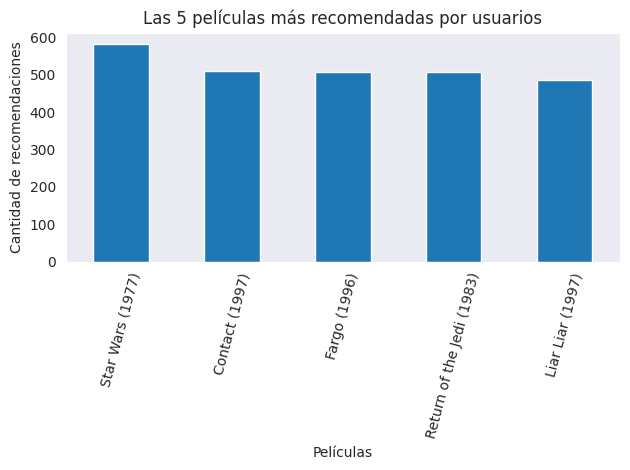

In [476]:

top_5 = df1.groupby("title").count()["raiting"].sort_values(ascending=False).head(5)

ax = top_5.plot(kind="bar")
plt.xlabel("Películas")
plt.ylabel("Cantidad de recomendaciones")
plt.title("Las 5 películas más recomendadas por usuarios")
plt.xticks(rotation=75)
plt.tight_layout()  # se ajusta el espaciado para evitar superposiciones
plt.show()


In [477]:
# puntaje promedio de cada pelicula
ratings=pd.DataFrame(df1.groupby("title").mean()['raiting'])
ratings['number of ratings']=pd.DataFrame(df1.groupby("title").count()["raiting"])
print(ratings.head())

                            raiting  number of ratings
title                                                 
'Til There Was You (1997)  2.333333                  9
1-900 (1994)               2.600000                  5
101 Dalmatians (1996)      2.908257                109
12 Angry Men (1957)        4.344000                125
187 (1997)                 3.024390                 41


<ipython-input-477-d9c7b6dd2004>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ratings=pd.DataFrame(df1.groupby("title").mean()['raiting'])


In [478]:
ratings.sort_values(by='raiting', ascending=False)

,raiting,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


**Distribucion de votacion de rating**

<function matplotlib.pyplot.show(close=None, block=None)>

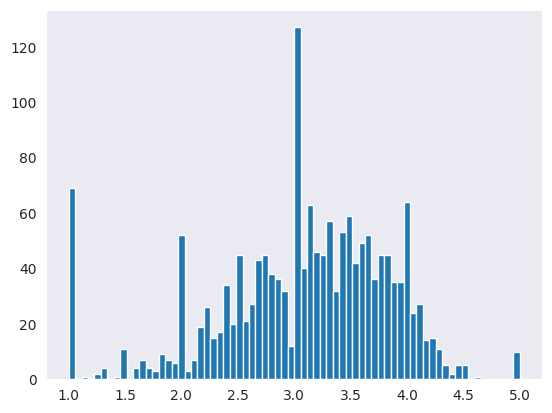

In [479]:
plt.hist(ratings['raiting'],bins=70)
plt.show

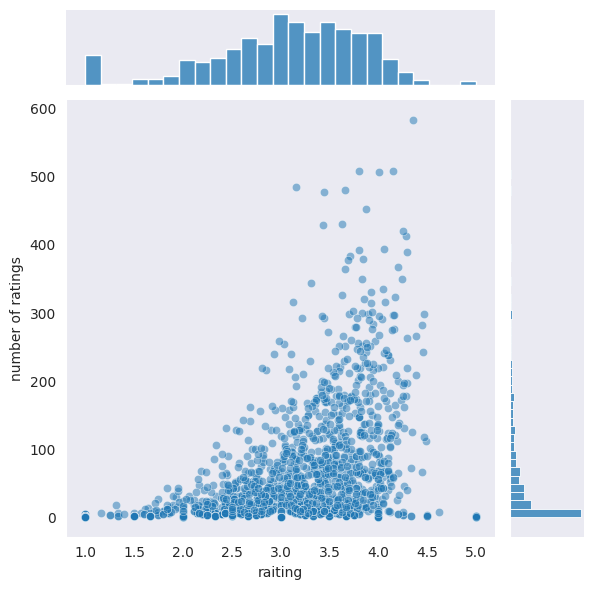

In [480]:
# valoraciones aisladas de peliculas
sns.jointplot(x='raiting',y='number of ratings',data=ratings,alpha=0.5)

# **Sistema de recomendacion filtrado colaborativo usuario-usuario**
Filtrado colaborativo usuario-usuario. Se  revisa los artículos calificados por los usuarios y, según las calificaciones, se calcula la correlación entre los usuarios

In [481]:
# se crea pivot table con datos de usuario, titulo de pelicula y su respectiva valoracion de usuario
#muestra el rating que le ha dado a cada pelicula, hay valores nulos porque no valoro todas las peliculas.
moviematrix=df1.pivot_table(index="id",columns="title",values='raiting')
print(moviematrix)

title  'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
id                                                                      
1                            NaN           NaN                    2.0   
2                            NaN           NaN                    NaN   
3                            NaN           NaN                    NaN   
4                            NaN           NaN                    NaN   
5                            NaN           NaN                    2.0   
..                           ...           ...                    ...   
939                          NaN           NaN                    NaN   
940                          NaN           NaN                    NaN   
941                          NaN           NaN                    NaN   
942                          NaN           NaN                    NaN   
943                          NaN           NaN                    NaN   

title  12 Angry Men (1957)  187 (1997)  2 Days in 

In [482]:
# se elige se ejemplo fargo como una de las pelis mas vistas para tomar de referencia en sistema de recomendación
fargo_user=moviematrix['Fargo (1996)']
fargo_user.head()


id
1    5.0
2    5.0
3    NaN
4    NaN
5    5.0
Name: Fargo (1996), dtype: float64

**Analisis por correlación**

In [483]:
#otros rating que dan dado los usuarios que vieron fargo
similar_fargo_user=moviematrix.corrwith(fargo_user)
similar_fargo_user

# valor cercano a 1 mejor correlacion, negativa o 0 correlacion nula.

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.100000
1-900 (1994)                             0.866025
101 Dalmatians (1996)                   -0.245368
12 Angry Men (1957)                      0.098676
187 (1997)                               0.142509
                                           ...   
Young Guns II (1990)                    -0.018688
Young Poisoner's Handbook, The (1995)   -0.034345
Zeus and Roxanne (1997)                 -0.353553
unknown                                 -0.101768
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [484]:
corr_fargo=pd.DataFrame(similar_fargo_user,columns=['correlation'])

In [485]:
#las peliculas con mas correlacion con fargo
corr_fargo=pd.DataFrame(similar_fargo_user,columns=['correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Open Season (1996),1.0
Maya Lin: A Strong Clear Vision (1994),1.0
Captives (1994),1.0
City of Industry (1997),1.0
"Convent, The (Convento, O) (1995)",1.0
Fargo (1996),1.0
"Smile Like Yours, A (1997)",1.0
"Journey of August King, The (1995)",1.0
King of the Hill (1993),1.0


In [486]:
corr_fargo = corr_fargo.join(ratings['number of ratings'], rsuffix='_ratings')

corr_fargo.head()


,correlation,number of ratings
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41


In [487]:
#peliculas con mas de 80 votaciones que tengan correlacion con fargo
corr_fargo[corr_fargo['number of ratings']>80].sort_values('correlation',ascending=False)

,correlation,number of ratings
title,,
Fargo (1996),1.000000,508
To Die For (1995),0.551740,87
Bullets Over Broadway (1994),0.491990,86
Bob Roberts (1992),0.384639,85
Sling Blade (1996),0.381159,136
...,...,...
Up Close and Personal (1996),-0.204752,85
Dirty Dancing (1987),-0.234389,98
101 Dalmatians (1996),-0.245368,109


**Funcion de recomendacion**

In [488]:
def predict_movies(movie_name):
    movie_user_ratings=moviematrix[movie_name]
    similar_to_movie=moviematrix.corrwith(movie_user_ratings)#correlacion con el resto de peliculas
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)# se eliminan nulos
    corr_movie=corr_movie.join(ratings['number of ratings'])#correlacion con otras peliculas
    predictions=corr_movie[corr_movie['number of ratings']>100].sort_values('correlation',ascending=False)#correlacion con peliculas que este mas de 100 veces votadas
    return predictions
predictions=predict_movies("As Good As It Gets (1997)")  #se reemplaza cualquier titulo para aplicarse
predictions.head(20)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,number of ratings
title,,
As Good As It Gets (1997),1.000000,112
Apt Pupil (1998),0.701931,160
"Mask, The (1994)",0.618215,129
Batman Forever (1995),0.587782,114
Glory (1989),0.533915,171
Ransom (1996),0.528958,267
Cold Comfort Farm (1995),0.522243,125
Under Siege (1992),0.504759,124
Men in Black (1997),0.485945,303


# **Evaluación del sistema de recomendación**

In [490]:


# Datos de los aciertos random (ground truth)
y_true = np.array([
    [1, 0],  # Película 1: Acierto en las posiciones 1 y 3
    [0, 1],
    [1, 0],
    [0, 0],
    [0, 1],
    [0, 0],
] * 56)

# Datos de las predicciones
y_scores = np.array(predictions)


#y_scores = y_ratings




# Mean Average Precision (AP) entre  lista de predicciones del sistema  y aciertos
def average_precision(y_true, y_scores):
    num_hits = 0
    precision_sum = 0
    for i in range(len(y_scores)):
        if y_true[i] == 1:
            num_hits += 1
            precision_sum += num_hits / (i + 1)
    if num_hits == 0:
        return 0
    return precision_sum / num_hits

# Función para calcular map de todos los casos de prueba
def mean_average_precision(y_true, y_scores):
    ap_sum = 0
    for i in range(len(y_scores)):
        ap_sum += average_precision(y_true[i], y_scores[i])
    return ap_sum / len(y_scores)

#  MAP
map_score = mean_average_precision(y_true, y_scores)
print("Mean Average Precision (MAP):", map_score)

Mean Average Precision (MAP): 0.5014970059880239


# **Recomendación por clusters  desde genero, edad y rating**

Se agrupa usuarios con gustos similares para recomendar ítems basados en el cluster.

In [493]:


# KMeans con el número de clusters deseado
kmeans = KMeans(n_clusters=3)

#  columnas relevantes para el clustering
data = df2[["raiting", "age", "genre_user"]]
kmeans.fit(data)

#  etiquetas de los clusters asignados a cada punto de datos
labels = kmeans.labels_
df2["cluster"] = labels

# predicciones
all_data = df2[["raiting", "age", "genre_user"]]  # Seleccionar todas las muestras del dataset
all_predictions = kmeans.predict(all_data)

#  DataFrame con recomendaciones
kmeans_df = pd.DataFrame(columns=['id', 'recomendacion'])
kmeans_df['id'] = df2['id']  # Copiar las columnas relevantes del DataFrame original
kmeans_df['recomendacion'] = all_predictions  # Agregar las recomendaciones



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [494]:
#  diccionario para almacenar las películas en cada cluster
cluster_movies = {}

for cluster in range(3):
    # Filtrar las películas que pertenecen al cluster actual
    cluster_movies[cluster] = df2[df2["cluster"] == cluster]["tittle"].tolist()

#  películas en cada cluster
for cluster, movies in cluster_movies.items():
    print(f"Cluster {cluster}: {movies}")

Cluster 0: ['belle de jour', 'bedknobs and broomsticks', 'evita', 'courage under fire', 'father of the bride', 'sleepers', 'cat people', 'soul food', 'renaissance man', 'charade', 'fox and the hound, the', 'big blue, the (grand bleu, le)', 'booty call', 'how to make an american quilt', 'georgia', 'indian in the cupboard, the', 'blue in the face', 'unstrung heroes', 'unzipped', 'before sunrise', "nobody's fool", 'pushing hands', 'to live (huozhe)', 'dazed and confused', 'naked', 'orlando', 'ruby in paradise', 'some folks call it a sling blade', 'month by the lake, a', 'funny face', 'affair to remember, an', 'little lord fauntleroy', 'inspector general, the', 'winnie the pooh and the blustery day', 'hear my song', 'mediterraneo', 'passion fish', 'grateful dead', 'eye for an eye', 'fear', 'solo', 'substitute, the', "heaven's prisoners", 'trigger effect, the', 'mother night', 'dangerous ground', 'maximum risk', "rich man's wife, the", 'shadow conspiracy', 'blood & wine', 'turbulence', 'und

In [495]:
# Filtrar las películas de cada cluster
cluster_0_movies = df2[df2['cluster'] == 0].head(10)
cluster_1_movies = df2[df2['cluster'] == 1].head(10)
cluster_2_movies = df2[df2['cluster'] == 2].head(10)

# Mostrar las películas de cada cluster
print("Cluster 0:")
print(cluster_0_movies)

print("Cluster 1:")
print(cluster_1_movies)

print("Cluster 2:")
print(cluster_2_movies)


Cluster 0:
      id movie_genre  raiting release_date movie_gender_num  \
29   160         NaN        5  01-Jan-1967              NaN   
141   87         NaN        4  01-Jan-1971              NaN   
288  113         NaN        5  25-Dec-1996              NaN   
470  137         NaN        5  08-Mar-1996              NaN   
608  294         NaN        3  01-Jan-1950              NaN   
627  244         NaN        2  18-Oct-1996              NaN   
673    5         NaN        1  01-Jan-1982              NaN   
879  256         NaN        3  01-Jan-1997              NaN   
943    7         NaN        2  01-Jan-1994              NaN   
944  256         NaN        4  01-Jan-1963              NaN   

                       tittle age  genre_user  cluster  
29              belle de jour   7           0        0  
141  bedknobs and broomsticks  13           0        0  
288                     evita  11           0        0  
470        courage under fire  10           0        0  
608       

In [496]:
# Hacer predicciones para todo el dataset
all_data = df2[["raiting", "age", "genre_user"]]  # Seleccionar todas las muestras del dataset
all_predictions = kmeans.predict(all_data)

# Crear un nuevo DataFrame con todas las recomendaciones de cada usuario
kmeans_df = df2.copy()
kmeans_df['recomendacion'] = all_predictions

# Establecer el índice como el ID
kmeans_df.set_index('id', inplace=True)

# Mostrar el DataFrame con el índice como el ID y las recomendaciones
print(kmeans_df[['recomendacion']])


     recomendacion
id                
196              1
186              2
22               1
244              1
166              1
..             ...
880              0
716              0
276              0
13               0
12               0

[100000 rows x 1 columns]


In [497]:
# Calcular la métrica del sistema de recomendación por clusters
def calcular_metrica_por_clusters(df, cluster_column, metric_column):
    # Calcular la métrica promedio por cluster
    metrica_clusters = df.groupby(cluster_column)[metric_column].mean()

    print(metrica_clusters)

calcular_metrica_por_clusters(kmeans_df, "cluster", "recomendacion")



cluster
0    0.0
1    1.0
2    2.0
Name: recomendacion, dtype: float64


# **Sistema de recomendación  Item-Item**

se realiza cambio de formato de la columna timestamp para comenzar el sistema de recomendacion

In [498]:
print(df['timestamp'].head())


0    881250949
1    891717742
2    878887116
3    880606923
4    886397596
Name: timestamp, dtype: int64


In [499]:

# se convierte a formato timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', origin='unix')

# cambio de formato
df['timestamp'] = df['timestamp'].dt.strftime('%d-%m-%Y')

df["timestamp"] = pd.to_datetime(df["timestamp"], errors='coerce')
df["timestamp"] = df["timestamp"].apply(lambda x: x.strftime('%Y-%m-%d') if pd.notnull(x) else '')

print(df)


<ipython-input-499-2465d9667538>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["timestamp"] = pd.to_datetime(df["timestamp"], errors='coerce')


        id  item_id  raiting   timestamp                   u.user
0      196      242        3  1997-04-12  1|24|M|technician|85711
1      186      302        3  1998-04-04       2|53|F|other|94043
2       22      377        1  1997-07-11      3|23|M|writer|32067
3      244       51        2  1997-11-27  4|24|M|technician|43537
4      166      346        1  1998-02-02       5|33|F|other|15213
...    ...      ...      ...         ...                      ...
99995  880      476        3  1997-11-22                      NaN
99996  716      204        5  1997-11-17                      NaN
99997  276     1090        1  1997-09-20                      NaN
99998   13      225        2  1997-12-17                      NaN
99999   12      203        3  1997-11-19                      NaN

[100000 rows x 5 columns]


In [500]:
print(f'fecha minima de reviews ',df.timestamp.min())
print(f'fecha max de reviews ',df.timestamp.max())

fecha minima de reviews  1997-01-10
fecha max de reviews  1998-12-04


In [501]:


df["timestamp"] = pd.to_datetime(df["timestamp"])
plot_df = df.copy()
plot_df["year"] = plot_df["timestamp"].dt.year
plot_df = plot_df.groupby("year", as_index=False).count()[["year", "id"]]
plot_df.columns = ["year", "reviews_count"]
plot_df.value_counts()



year  reviews_count
1997  52899            1
1998  47101            1
dtype: int64

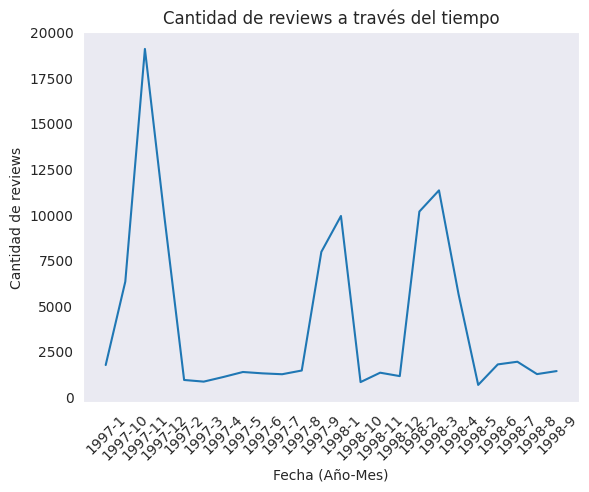

In [502]:

plot_df = df.copy()
plot_df["year"] = plot_df["timestamp"].dt.year
plot_df["month"] = plot_df["timestamp"].dt.month
plot_df = plot_df.groupby(["year", "month"], as_index=False).count()[["year", "month", "id"]]
plot_df.columns = ["year", "month", "reviews_count"]


plot_df["date"] = plot_df["year"].astype(str) + "-" + plot_df["month"].astype(str)
plot_df = plot_df.sort_values("date")
plt.plot(plot_df["date"], plot_df["reviews_count"])
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Cantidad de reviews")
plt.title("Cantidad de reviews a través del tiempo")

plt.xticks(rotation=45)

plt.show()


In [503]:


# fechas de inicio y fin para el conjunto de entrenamiento y prueba
fecha_inicio_entrenamiento = datetime(year=1997,month=1, day=1)
fecha_fin_entrenamiento = datetime(year=1998,month=1, day=1)

# conjunto de datos en entrenamiento y prueba
train = df[(df["timestamp"] >= fecha_inicio_entrenamiento) & (df["timestamp"] < fecha_fin_entrenamiento)]
test = df[df["timestamp"] >= fecha_fin_entrenamiento]


train.shape


(52899, 5)

In [504]:
test.shape
test.id.nunique()
test[~test.id.isin(train.id.unique())].id.nunique()

413

In [505]:
matrix_columns = ['id', 'item_id', 'raiting']
interactions = train[matrix_columns]
interactions.head()

,id,item_id,raiting
0,196,242,3
2,22,377,1
3,244,51,2
6,115,265,2
9,6,86,3


In [506]:
interactions_matrix = interactions.pivot(index="id", columns='item_id', values="raiting")
interactions_matrix = interactions_matrix.fillna(0)

In [507]:
interactions_matrix.head()
interactions_matrix.shape

(530, 1493)

In [508]:
interactions_matrix_csr = csr_matrix(interactions_matrix.values)
interactions_matrix_csr

<530x1493 sparse matrix of type '<class 'numpy.float64'>'
	with 52899 stored elements in Compressed Sparse Row format>

In [509]:
user_ids = list(interactions_matrix.index)
user_dict = {}
counter = 0
for i in user_ids:
    user_dict[i] = counter
    counter += 1

In [510]:
user_dict

{1: 0,
 5: 1,
 6: 2,
 8: 3,
 10: 4,
 12: 5,
 13: 6,
 14: 7,
 15: 8,
 16: 9,
 18: 10,
 20: 11,
 21: 12,
 22: 13,
 23: 14,
 24: 15,
 28: 16,
 29: 17,
 30: 18,
 31: 19,
 35: 20,
 36: 21,
 37: 22,
 42: 23,
 43: 24,
 44: 25,
 45: 26,
 46: 27,
 47: 28,
 48: 29,
 50: 30,
 51: 31,
 52: 32,
 53: 33,
 54: 34,
 55: 35,
 60: 36,
 62: 37,
 63: 38,
 64: 39,
 65: 40,
 66: 41,
 67: 42,
 68: 43,
 69: 44,
 71: 45,
 72: 46,
 76: 47,
 78: 48,
 80: 49,
 81: 50,
 82: 51,
 83: 52,
 84: 53,
 85: 54,
 86: 55,
 87: 56,
 89: 57,
 92: 58,
 95: 59,
 98: 60,
 101: 61,
 102: 62,
 103: 63,
 106: 64,
 108: 65,
 109: 66,
 113: 67,
 114: 68,
 115: 69,
 116: 70,
 117: 71,
 118: 72,
 119: 73,
 122: 74,
 123: 75,
 125: 76,
 128: 77,
 129: 78,
 130: 79,
 135: 80,
 136: 81,
 137: 82,
 138: 83,
 139: 84,
 140: 85,
 145: 86,
 148: 87,
 149: 88,
 150: 89,
 151: 90,
 152: 91,
 153: 92,
 154: 93,
 155: 94,
 157: 95,
 158: 96,
 159: 97,
 160: 98,
 162: 99,
 165: 100,
 172: 101,
 173: 102,
 175: 103,
 177: 104,
 178: 105,
 180: 106

In [511]:

model = LightFM(no_components=3, random_state=100, learning_rate=0.03)

In [512]:
model = model.fit(interactions_matrix_csr, epochs=10)

In [513]:
model

In [514]:
#se toma un usuario random para comenzar la matriz de interaccion
user_x = user_dict[18]
n_users, n_items = interactions_matrix.shape
item_ids = np.arange(n_items)

preds = model.predict(user_ids=user_x, item_ids = item_ids)

In [515]:
#primeras 10 recomendaciones
scores = pd.Series(preds)
scores.index = interactions_matrix.columns
recomms_18 = list(pd.Series(scores.sort_values(ascending=False).index))[:10]

In [516]:
train[(train.id==18)]['item_id'].unique()

array([443,  26,  86, 408, 950, 202, 729, 182, 113, 496, 387, 863, 965,
       494, 154,  58, 647, 199, 607, 196, 954,  69, 214, 488, 602, 498,
       209, 630, 964,  82, 739, 367, 462,  25, 699, 190, 530, 191, 971,
       513,  14,  89, 194, 515, 286,  71,  12, 181, 483, 180, 960, 179,
       610, 276, 136, 778, 526, 792, 732, 970,  57, 195, 185, 186, 463,
       215, 660, 237, 955, 188,  47, 428, 692, 968, 193, 169, 170, 393,
       509, 629, 953, 423, 485,  64,  99,  19, 966, 659, 275, 131, 497,
         1,  97, 224, 126, 451, 162,  70, 479,  13, 775, 318, 609, 523,
       135, 241, 794, 151, 152, 432, 923, 514, 487, 234, 705, 527, 961,
       921, 663, 404, 762, 403, 845,   6, 378, 654,  65,  79,  60, 476,
       735, 416,   4,  45, 287, 319, 520, 168, 153, 211, 486,  61, 951,
       430, 402, 165,  91, 519, 284, 949, 200, 474,   9, 972,  94, 707,
       480, 639, 166, 781, 425, 132, 588, 435, 213, 504, 582, 478, 461,
        42, 177, 198,  98, 283, 973, 805, 709, 236,  66,  95, 15

In [517]:
train[(train.id==18) & (train['item_id'].isin(recomms_18))]['item_id'].unique()

array([286, 181,   1, 100,  50, 127])

In [518]:
user_18_watched = train[train.id == 18]['item_id'].unique()
recomms_18 = [rec for rec in recomms_18 if rec not in user_18_watched]
recomms_18

[258, 294, 288, 7]

# **Cold start**

In [519]:
train.groupby("item_id", as_index=False).agg({"id":"nunique"})

,item_id,id
0,1,267
1,2,70
2,3,57
3,4,123
4,5,50
...,...,...
1488,1662,1
1489,1664,1
1490,1676,1
1491,1677,1


In [520]:
popularity_df = train.groupby("item_id", as_index=False).agg({"id":"nunique"}).sort_values(by="id", ascending=False)

popularity_df.columns=["item_id", "popularity"]
popularity_df.head()
popular_content = popularity_df['item_id'].values[:10]
popularity_df.head(10)['item_id'].values

array([ 50, 100, 181,   1, 294, 286, 121, 258,   7, 288])

In [521]:


recomms_dict = {
    'user_id': [],
    'recomms': []
}

# cantidad de usuarios y cantidad de items
n_users, n_items = interactions_matrix.shape
item_ids = np.arange(n_items)

#por cada usuario del dataset de test, generamos recomendaciones
for user in tqdm(test.id.unique()):
    # Validar si el usuario se encuentra en la matriz de interacciones (interactions_matrix.index)
    if user in list(interactions_matrix.index):
      # Si el usuario esta en train, no es cold start. Usamos el modelo para recomendar
      user_x = user_dict[user] #buscamos el indice del usuario en la matriz (transformamos id a indice)

      #: Generar las predicciones para el usuario x
      preds = model.predict(user_ids=user_x, item_ids = item_ids)

      #: Basándose en el ejemplo anterior, ordenar las predicciones de menor a mayor y quedarse con 50.
      scores = pd.Series(preds)
      scores.index = interactions_matrix.columns
      scores = list(pd.Series(scores.sort_values(ascending=False).index))[:50]

      #: Obtener listado de contenidos vistos anteriormente por el usuario (en el set de train)
      watched_contents = train[train.id == user]['item_id'].unique()

      #: Filtrar contenidos ya vistos y quedarse con los primeros 10
      recomms = [x for x in scores if x not in watched_contents][:10]

      # Guardamos las recomendaciones en el diccionario
      recomms_dict['user_id'].append(user)
      recomms_dict['recomms'].append(scores)

    # En este else trataremos a los usuarios que no están en la matriz (cold start)
    else:
      recomms_dict['user_id'].append(user)
      # Les recomendamos contenido popular
      recomms_dict['recomms'].append(popular_content)




100%|██████████| 551/551 [00:00<00:00, 694.30it/s]
